In [1]:
#[  5735762.   6198182.   6278762.  10545066.  10748390.  11100383. 11709006.]
import numpy as np 
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import os
import time


In [2]:
koi_table = pd.read_csv("../../Training/catalogs/shortperiodbright_KOI.csv")
print koi_table.columns.values
koi_table.head()

['rowid' 'kepid' 'kepoi_name' 'kepler_name' 'koi_disposition'
 'koi_pdisposition' 'koi_score' 'koi_fpflag_nt' 'koi_fpflag_ss'
 'koi_fpflag_co' 'koi_fpflag_ec' 'koi_period' 'koi_period_err1'
 'koi_period_err2' 'koi_time0bk' 'koi_time0bk_err1' 'koi_time0bk_err2'
 'koi_impact' 'koi_impact_err1' 'koi_impact_err2' 'koi_duration'
 'koi_duration_err1' 'koi_duration_err2' 'koi_depth' 'koi_depth_err1'
 'koi_depth_err2' 'koi_prad' 'koi_prad_err1' 'koi_prad_err2' 'koi_teq'
 'koi_teq_err1' 'koi_teq_err2' 'koi_insol' 'koi_insol_err1'
 'koi_insol_err2' 'koi_model_snr' 'koi_tce_plnt_num' 'koi_tce_delivname'
 'koi_steff' 'koi_steff_err1' 'koi_steff_err2' 'koi_slogg' 'koi_slogg_err1'
 'koi_slogg_err2' 'koi_srad' 'koi_srad_err1' 'koi_srad_err2' 'ra' 'dec'
 'koi_kepmag']


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,4966,10000941,K04146.01,Kepler-1558 b,CONFIRMED,CANDIDATE,0.999,0,0,0,...,-139.0,4.477,0.095,-0.105,0.854,0.103,-0.093,286.81937,46.911690,13.632
1,4967,10000941,K04146.02,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,...,-139.0,4.477,0.095,-0.105,0.854,0.103,-0.093,286.81937,46.911690,13.632
2,2605,10024701,K02002.01,Kepler-1046 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-130.0,4.403,0.076,-0.114,1.053,0.168,-0.104,296.75574,46.998291,13.286
3,7125,10053138,K07279.01,NaN,CANDIDATE,CANDIDATE,0.769,0,0,0,...,-72.0,4.333,0.154,-0.126,1.056,0.191,-0.173,280.71948,47.072220,13.717
4,5105,10063208,K04292.01,Kepler-1583 b,CONFIRMED,CANDIDATE,0.995,0,0,0,...,-82.0,4.514,0.032,-0.128,0.888,0.138,-0.046,286.38693,47.016628,12.897


In [3]:
#Strong stars we are still missing as at SNR at or greater 13
#9790806 -> ~9 SNR peak strength, period mostly correctly detected except for one, SNR = 20
#11551692 --> multiplanet system, SNR = 60
#10878263 --multiplanet system, SNR = 20
#9527334 --> single planet, high SNR, correctly detected period, SNR = 19
#8142942 --> some low signal peak strength, sinlge planet, SNR = 13.7 (SNR takes segments SNR median, thus not affected by a few bad cases)
#7626506 --> single strong planet with small enough period, but odd second signal in light curves, SNR = 21
#7447200 --> multiplanet sytem with both strong signals, thrown of by tertiary signals SNR = 70
#6029239 --> unsure why this i sbeing missed, multiplanet system, but secondary plant is too weak to mess up signal, SNR =21
#4563268 --> the secondary planets signal is strong enough to be seen in some segments, SNR =14

In [8]:
#missed_strong = np.loadtxt("../Data/Missed_Strong_Stars.txt").astype(int)
#missed_strong = np.loadtxt("../Data/Missed_Strong_Stars_Period_Cut.txt").astype(int)
unique_ids = np.unique(koi_table["kepid"])
#print koi_table.columns.values
#np.savetxt("../Data/Unique_Stars.txt", unique_ids)
#print missed_strong.shape
multi_planet_stars = np.unique(koi_table['kepid'][ np.where(koi_table["koi_tce_plnt_num"]>1)[0]])
#star_id = 2302548
#star_id=missed_strong[12]
star_id = multi_planet_stars[4]
star_id = 10736489#4563268#6029239#7447200#7626506#8142942#9527334#9790806#10878263#11017901
print star_id
star_table = koi_table[koi_table["kepid"] == star_id]
star_table[["kepid","koi_period", "koi_model_snr"]]
#koi_table["kepid"]
print koi_table["koi_period"].max()
#[  4563268.   6029239.   7447200.   7626506.   8142942.   9527334.  9790806.  10878263.  11551692.]
star_table

10736489
19.96367208


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
37,7203,10736489,K07368.01,NaN,CANDIDATE,CANDIDATE,1.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293.94763,48.065254,12.92


In [9]:
detected_period = star_table["koi_period"]#.values[0]
print detected_period
print star_table["koi_model_snr"]#.values[0]/7

37    6.842939
Name: koi_period, dtype: float64
37   NaN
Name: koi_model_snr, dtype: float64


In [10]:
files = os.listdir("../../Training/simulation/primaryKOI_try2//")
files = [x for x in files if str(star_id) in x and "blsanal" in x]
print files

['10736489-0_prim_ltf.blsanal', '10736489-10_prim_ltf.blsanal', '10736489-11_prim_ltf.blsanal', '10736489-12_prim_ltf.blsanal', '10736489-13_prim_ltf.blsanal', '10736489-1_prim_ltf.blsanal', '10736489-2_prim_ltf.blsanal', '10736489-3_prim_ltf.blsanal', '10736489-4_prim_ltf.blsanal', '10736489-5_prim_ltf.blsanal', '10736489-6_prim_ltf.blsanal', '10736489-7_prim_ltf.blsanal', '10736489-8_prim_ltf.blsanal', '10736489-9_prim_ltf.blsanal']


In [11]:
print detected_period

for file_name in files:
    bls = np.loadtxt("../../Training/simulation/primaryKOI_try2///" + file_name)[0,1:]
    bls_period = bls[0]
    bls_SNR = bls[-1]
    print file_name, bls_period, bls_SNR
    #print np.abs(bls_period-detected_period)/ (0.5*(bls_period+detected_period))
    #print bls_period+detected_period

37    6.842939
Name: koi_period, dtype: float64
10736489-0_prim_ltf.blsanal 1.30744458 81.95527
10736489-10_prim_ltf.blsanal 2.61596441 14.35187
10736489-11_prim_ltf.blsanal 1.32861449 45.69875
10736489-12_prim_ltf.blsanal 1.30800787 85.16106
10736489-13_prim_ltf.blsanal 1.30754395 75.01018
10736489-1_prim_ltf.blsanal 1.26687956 58.66871
10736489-2_prim_ltf.blsanal 1.31937639 55.02893
10736489-3_prim_ltf.blsanal 2.62407746 22.05426
10736489-4_prim_ltf.blsanal 2.57588305 11.69892
10736489-5_prim_ltf.blsanal 2.60028083 21.27048
10736489-6_prim_ltf.blsanal 2.5641098 10.67076
10736489-7_prim_ltf.blsanal 2.52905518 8.65414
10736489-8_prim_ltf.blsanal 1.30790843 83.76829
10736489-9_prim_ltf.blsanal 1.32700897 52.33122


[ 6.842939]


(9.9561872999999999, 10.026081399999999)

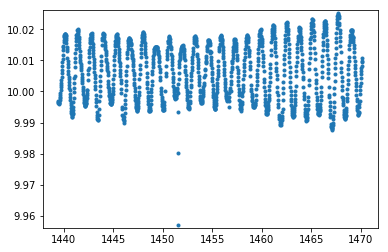

In [18]:
data = np.loadtxt("../../Training/simulation/primaryKOI_try2/"+str(star_id)+"-12_prim_ltf.lc")
print detected_period.values
plt.scatter(data[:,0], data[:,2], marker = ".")
#plt.scatter(data[:,0], data[:,2], marker = ".")
axes = plt.gca()
axes.set_ylim([data[:,2].min()-0.001, data[:,2].max()+0.001])